### Import Module

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

### Show Image Module

In [26]:
def plt_show(img):
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.show()

In [27]:
def cv_show(img):
    cv2.imshow('Mean Filtered Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### Prewitt Operator

In [28]:
def prewitt_operator_meth(img):
    mask_gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype='float')
    mask_gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype='float')
    gx = cv2.filter2D(img, -1, mask_gx)
    gy = cv2.filter2D(img, -1, mask_gy)
    out = np.sqrt(gx**2 + gy**2)
    return out.astype(np.uint8)

In [29]:
def edge_operator_meth(img, k):
    f = img.copy().astype(np.float16)
    out = np.zeros_like(img, dtype = 'float16')
    mask_gx = np.array([[-1, 0, 1], [-k, 0, k], [-1, 0, 1]], dtype='float16')
    mask_gy = np.array([[-1, -k, -1], [0, 0, 0], [1, k, 1]] , dtype = 'float16')

    sz, sz = mask_gx.shape
    bd = sz // 2
    (m,n) = f.shape
    for i in range(bd, m-bd):
        for j in range(bd, n-bd):
            gx, gy = 0., 0.
            sub_f = f[i - bd : i + bd + 1, j - bd : j + bd + 1]
            gx = np.multiply(sub_f, mask_gx).sum()
            gy = np.multiply(sub_f, mask_gy).sum() 
            out[i, j] = np.sqrt(gx**2 + gy**2)
    out[out>255.0] = 255.0
    return out.astype(np.uint8)


### 1. Read Image

In [30]:
image = cv2.imread(r'C:\Users\Thichanon\Desktop\University\COS3401\Week6\images\alphabet.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

C:\Users\Thichanon\AppData\Local\Temp\ipykernel_8004\3376633125.py:16: RuntimeWarning: overflow encountered in scalar power
  out[i, j] = np.sqrt(gx**2 + gy**2)
C:\Users\Thichanon\AppData\Local\Temp\ipykernel_8004\3376633125.py:16: RuntimeWarning: overflow encountered in scalar add
  out[i, j] = np.sqrt(gx**2 + gy**2)


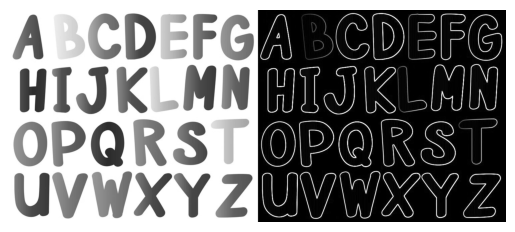

In [31]:
out = prewitt_operator_meth(gray)
out = edge_operator_meth(gray, 1)
imgs = cv2.hconcat([gray, out])
plt_show(imgs)

### Sobel Operator

In [32]:
def sobel_operator(img):
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    out = np.sqrt(gx**2 + gy**2)
    return out.astype(np.uint8)

C:\Users\Thichanon\AppData\Local\Temp\ipykernel_8004\3376633125.py:16: RuntimeWarning: overflow encountered in scalar power
  out[i, j] = np.sqrt(gx**2 + gy**2)
C:\Users\Thichanon\AppData\Local\Temp\ipykernel_8004\3376633125.py:16: RuntimeWarning: overflow encountered in scalar add
  out[i, j] = np.sqrt(gx**2 + gy**2)


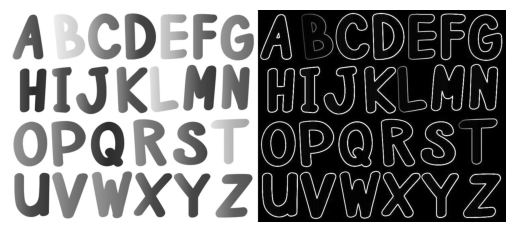

In [33]:
out = edge_operator_meth(gray, 2)
imgs = cv2.hconcat([gray, out])
plt_show(imgs)

### Canny Operator

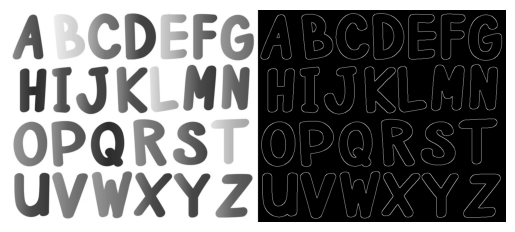

In [38]:
out = cv2.Canny(gray, 50, 150)
imgs = cv2.hconcat([gray, out])
plt_show(imgs)